# STAR WARS SURVEY - A PROJECT ON DATA CLEANING & EDA

Star Wars, originally a trilogy, is a space opera fantasy franchise set in the distant past of a fictional galaxy. <br>
While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?
<br>
The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. The responses can be downloaded from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

### PROBLEM DEFINITION
In this project we will attempt to answer 4 main questions: <br>
1. Which is the most viewed movie among Star Wars episodes 1 through 6? <br>
2. Which is the audience favorite movie among Star Wars episodes 1 through 6? <br> 
3. Which character is the audience favorite? Who is the least favorite and who is the most unfamiliar? <br>
4. How do the responses to questions (1) and (2) vary between Star Trek & Non Star Trek fans? <br>

### SUMMARY OF RESULTS

### DATA DICTIONARY  
The data has several columns, including:
<br>
1. RespondentID - An anonymized ID for the respondent (person taking the survey) <br>
2. Gender - The respondent's gender <br>
3. Age - The respondent's age <br>
4. Household Income - The respondent's income <br>
5. Education - The respondent's education level <br>
6. Location (Census Region) - The respondent's location <br>
7. Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response <br>
8. Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response <br> & many more other columns.

### BREAKDOWN OF NOTEBOOK
- Importing Required Libraries & Loading Dataset
- Data cleaning:
  1. Removing duplicates and invalid entries
  2. Cleaning & Mapping the Yes/No columns
  3. Cleaning & Mapping the Checkbox columns
  4. Cleaning the Radio Button columns
- Exploratory Data Analysis:
  1. Most favorite movie / highest ranked movie
  2. Most viewed movie
  3. Character favorability ratings
  4. Exporing 1. & 2. by binary segmentation into Star Trek and non- Star Trek fan groups.

### IMPORTING REQUIRED LIBRARIES & READING THE DATA SET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
star_wars = pd.read_csv(r"C:\Users\niveh\Desktop\star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Column1', '_1', '_2', '_3', '_4',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       '_5', '_6', '_7', '_8', '_9',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       '_10', '_11', '_12', '_13', '_14', '_15', '_16', '_17', '_18', '_19',
       '_20', '_21', '_22', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?æ',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Inco

In [3]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Column1,_1,_2,_3,_4,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,_22,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
star_wars.shape

(1187, 38)

### DATA CLEANING

#### 1. Removing duplicates & Invalids
RespondentID is supposed to be a unique ID for each respondent, but it's blank in some rows. We'll first need to remove any rows with an invalid RespondentID.

In [5]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars.shape

(1186, 38)

In [6]:
star_wars['RespondentID'].nunique()

1186

We observe that except for the one entry where RespondentID was NaN, the rest of the values are unique.

#### 2. Cleaning & Mapping the Yes/No columns

We observe that many of the columns have a Yes/No type response. There can also be a NaN in these cases where the respondent chooses not to answer a question.
<br>
These columns are currently 'object' type as they contain string values. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values True, False, and NaN. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

In [7]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [8]:
star_wars['Are you familiar with the Expanded Universe?'].value_counts(dropna=False)

No     615
NaN    358
Yes    213
Name: Are you familiar with the Expanded Universe?, dtype: int64

In [9]:
# Columns which have a Yes/No/NaN response
columns = ['Have you seen any of the 6 films in the Star Wars franchise?','Do you consider yourself to be a fan of the Star Wars film franchise?',
          'Are you familiar with the Expanded Universe?','Do you consider yourself to be a fan of the Expanded Universe?æ','Do you consider yourself to be a fan of the Star Trek franchise?']

# Dictionary to map the string values (Yes/No) to a boolean T/F
yes_no = {'Yes':True, 'No':False}

for c in columns:
    star_wars[c]=star_wars[c].map(yes_no)

In [10]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

#### 2. Cleaning & Mapping the Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, 'Which of the following Star Wars films have you seen? Please select all that apply.'

The columns for this question are:
<br>

Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace. <br>
Column_1 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones. <br>
_1 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith. <br>
_2 - Whether or not the respondent saw Star Wars: Episode IV A New Hope. <br>
_3 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back. <br>
_4 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi. <br>

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column to something more intuitive. 

In [11]:
star_wars.rename({'Which of the following Star Wars films have you seen? Please select all that apply.':'Seen_Ep_1',
                          'Column1':'Seen_Ep_2','_1':'Seen_Ep_3','_2':'Seen_Ep_4','_3':'Seen_Ep_5','_4':'Seen_Ep_6'},axis=1,inplace=True)

In [12]:
star_wars.iloc[0]

RespondentID                                                                                                                                                                      3.29288e+09
Have you seen any of the 6 films in the Star Wars franchise?                                                                                                                             True
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                                                                    True
Seen_Ep_1                                                                                                                                            Star Wars: Episode I  The Phantom Menace
Seen_Ep_2                                                                                                                                         Star Wars: Episode II  Attack of the Clones
Seen_Ep_3                                         

In [13]:
# Converting each of the 6 mentioned columns so that they only contain True / False values
mapping_dict = {'Star Wars: Episode I  The Phantom Menace':True, np.NaN:False,'Star Wars: Episode II  Attack of the Clones':True,
               'Star Wars: Episode III  Revenge of the Sith':True, 'Star Wars: Episode IV  A New Hope':True,
               'Star Wars: Episode V The Empire Strikes Back':True,  'Star Wars: Episode VI Return of the Jedi':True}
for c in star_wars.columns[3:9]:
    star_wars[c] = star_wars[c].map(mapping_dict)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Seen_Ep_1,Seen_Ep_2,Seen_Ep_3,Seen_Ep_4,Seen_Ep_5,Seen_Ep_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,_22,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


#### 3. Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN: <br>
Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace <br>
_5 - How much the respondent liked Star Wars: Episode II Attack of the Clones <br>
_6 - How much the respondent liked Star Wars: Episode III Revenge of the Sith <br>
_7 - How much the respondent liked Star Wars: Episode IV A New Hope <br>
_8 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back <br>
_9 - How much the respondent liked Star Wars: Episode VI Return of the Jedi <br>

 We'll need to convert each column to a numeric type and then rename the columns so that we can tell what they represent more easily.

In [14]:
star_wars[star_wars.columns[9:15]]=star_wars[star_wars.columns[9:15]].astype(float)

In [15]:
star_wars.rename({'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'Rank_Ep_1',
                          '_5':'Rank_Ep_2','_6':'Rank_Ep_3','_7':'Rank_Ep_4','_8':'Rank_Ep_5','_9':'Rank_Ep_6'},axis=1,inplace=True)

In [16]:
star_wars.iloc[0:3,0:15]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Seen_Ep_1,Seen_Ep_2,Seen_Ep_3,Seen_Ep_4,Seen_Ep_5,Seen_Ep_6,Rank_Ep_1,Rank_Ep_2,Rank_Ep_3,Rank_Ep_4,Rank_Ep_5,Rank_Ep_6
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0


#### 4. Cleaning the Radio Button Columns

In [17]:
star_wars.columns[15:29]

Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       '_10', '_11', '_12', '_13', '_14', '_15', '_16', '_17', '_18', '_19',
       '_20', '_21', '_22'],
      dtype='object')

We will need to find out which characters each of the columns corresponding to '_10' to '_22' represent. To create a mapping dictionary for this, the following reference from fivethirtyeight was used - [link](https://fivethirtyeight.datasettes.com/fivethirtyeight/star-wars-survey%2FStarWars) , which provides with the required information. 

In [18]:
character_mapping={'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Han Solo',
                  '_10':'Luke Skywalker','_11':'Princess Leia Organa','_12':'Anakin Skywalker','_13':'Obi Wan Kenobi',
                  '_14':'Emperor Palpatine','_15':'Darth Vader','_16':'Lando Calrissian','_17':'Boba Fett',
                 '_18':'C-3P0','_19':'R2 D2','_20':'Jar Jar Binks','_21':'Padme Amidala','_22':'Yoda'}
star_wars.rename(character_mapping,axis=1,inplace=True)


In [19]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Seen_Ep_1', 'Seen_Ep_2', 'Seen_Ep_3', 'Seen_Ep_4', 'Seen_Ep_5',
       'Seen_Ep_6', 'Rank_Ep_1', 'Rank_Ep_2', 'Rank_Ep_3', 'Rank_Ep_4',
       'Rank_Ep_5', 'Rank_Ep_6', 'Han Solo', 'Luke Skywalker',
       'Princess Leia Organa', 'Anakin Skywalker', 'Obi Wan Kenobi',
       'Emperor Palpatine', 'Darth Vader', 'Lando Calrissian', 'Boba Fett',
       'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda',
       'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?æ',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

### EXPLORATORY DATA ANALYSIS

#### 1. Finding the highest ranked movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly. To do this, take the mean of each of the ranking columns using the pd.DataFrame.mean() method on dataframes.

In [20]:
avg = pd.DataFrame.mean(star_wars.loc[:,'Rank_Ep_1':'Rank_Ep_6'])
print(avg.values)

[3.73293413 4.08732057 4.34131737 3.27272727 2.51315789 3.04784689]


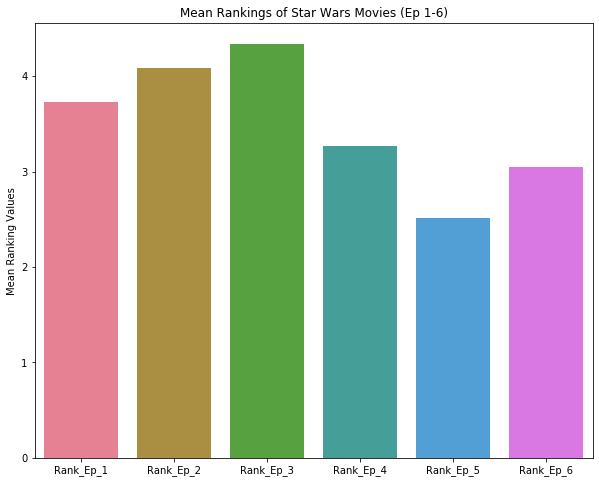

In [21]:
fig,ax = plt.subplots(figsize = (10,8))
labels = list(star_wars.columns[9:15])
sns.barplot(x=labels,y=avg.values,palette='husl')
ax.set_ylabel('Mean Ranking Values')
ax.set_title('Mean Rankings of Star Wars Movies (Ep 1-6)')
plt.show()

The highest ranked movie (ie. audience favorite based on the FiveThirtyEight survey) is "Star Wars: Episode V The Empire Strikes Back".
<br>
The original trilogy of the Star Wars movies - Episode 4 (A New Hope), Episode 5 (The Empire Strikes Back) & Episdoe 6 (The Return of the Jedi) are liked more by the audience as compared to the prequel trilogy - Episode 1 (The Phantom Menace), Episode 2 (The attack of the Clones) & Episode 3 (The Revenge of the Sith). 

#### 2. Finding the most-viewed movie

Earlier in this project, we cleaned up the Seen_Ep_1 through Seen_Ep_6 columns and converted their values to the Boolean type. Hence, we can figure out how many people have seen each movie just by taking the sum of the column.

In [22]:
total = pd.DataFrame.sum(star_wars.loc[:,'Seen_Ep_1':'Seen_Ep_6'])
print(total.values)

[673 571 550 607 758 738]


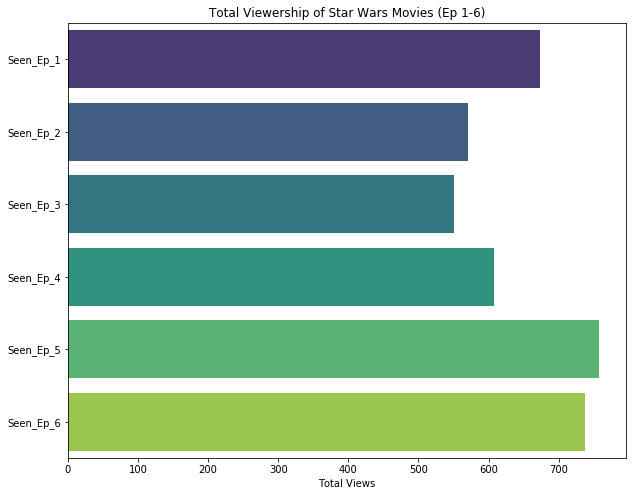

In [23]:
fig,ax = plt.subplots(figsize = (10,8))
labels=['Seen_Ep_1','Seen_Ep_2','Seen_Ep_3','Seen_Ep_4','Seen_Ep_5','Seen_Ep_6']
sns.barplot(y=labels,x=total.values,palette='viridis')
ax.set_xlabel('Total Views')
ax.set_title('Total Viewership of Star Wars Movies (Ep 1-6)')
plt.show()

#### 3. Finding the most and least favorable character

In [24]:
star_wars['Han Solo'].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han Solo, dtype: int64

In [25]:
characters = star_wars.columns[15:29]
print(characters)

Index(['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'],
      dtype='object')


In [26]:
favorable = []
neutral = []
unfamiliar = []
unfavorable = []

for c in characters:
    favorable.append(star_wars[c].value_counts()[0:2].sum())
    neutral.append(star_wars[c].value_counts()[2:3].sum())
    unfamiliar.append(star_wars[c].value_counts()[3:4].sum())
    unfavorable.append(star_wars[c].value_counts()[4:6].sum())

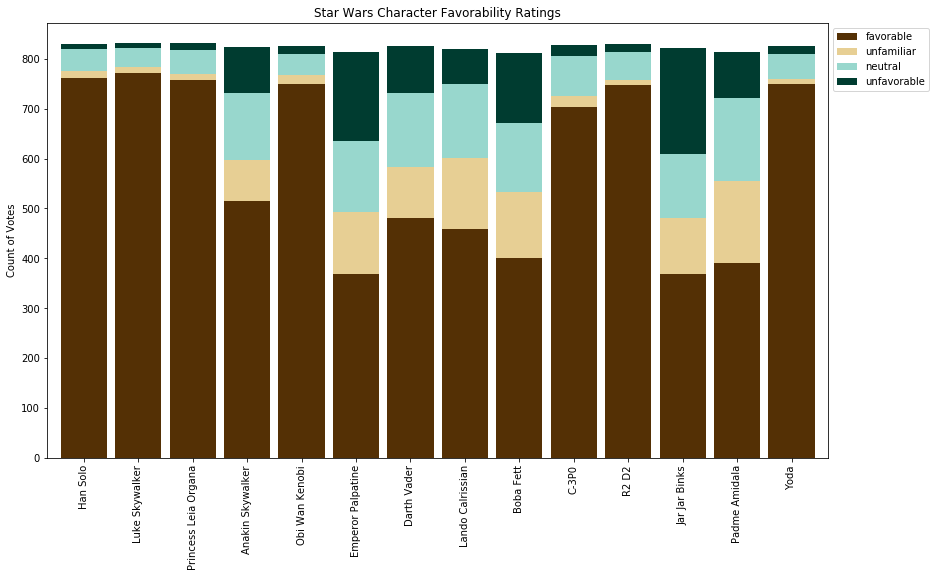

In [27]:
df = pd.DataFrame({'favorable': favorable,'unfamiliar':unfamiliar,
                   'neutral': neutral,
                   'unfavorable':unfavorable}, index=characters)
ax = df.plot(kind='bar',figsize=(14,8),stacked=True,colormap='BrBG',width=0.85)
ax.legend(bbox_to_anchor=[1, 1])
plt.title('Star Wars Character Favorability Ratings')
plt.ylabel('Count of Votes')        
plt.show()

We can observe from the above stacked bar plot the following : <br>
1. The most favorable character is Luke Skywalker, closely followed by Han Solo. <br>
2. The most unfavorable character is Jar Jar Binks. <br>
3. The most unfamiliar charcater is Padme Amidala.

#### 4. Exploring Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. We can split a dataframe into two groups based on a binary column by creating two subsets of that column.

Star Trek is a highly popular worldwide American media franchise originating from the 1960s science fiction television series. Star Trek has remained a cult phenomenon for decades. It's the main rival of the Star Wars franchise in the space science fiction genre.

In [28]:
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts(dropna=False)

False    641
True     427
NaN      118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

We note that most of the audience who took the poll are not star trek fans. Let us see how the two groups - Star Trek Fans and Non Star Trek Fans differ in their choices of highest ranked and most viewed movies. 

In [29]:
star_trek_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']==True]
non_star_trek_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']==False]
print(star_trek_fans.shape,non_star_trek_fans.shape)

(427, 38) (641, 38)


In [30]:
index = ['star_trek_fans','non_star_trek_fans']
labels=['Seen_Ep_1','Seen_Ep_2','Seen_Ep_3','Seen_Ep_4','Seen_Ep_5','Seen_Ep_6']
tot_views_st_fans = pd.DataFrame.sum(star_trek_fans.loc[:,'Seen_Ep_1':'Seen_Ep_6']).values
tot_views_non_st_fans = pd.DataFrame.sum(non_star_trek_fans.loc[:,'Seen_Ep_1':'Seen_Ep_6']).values

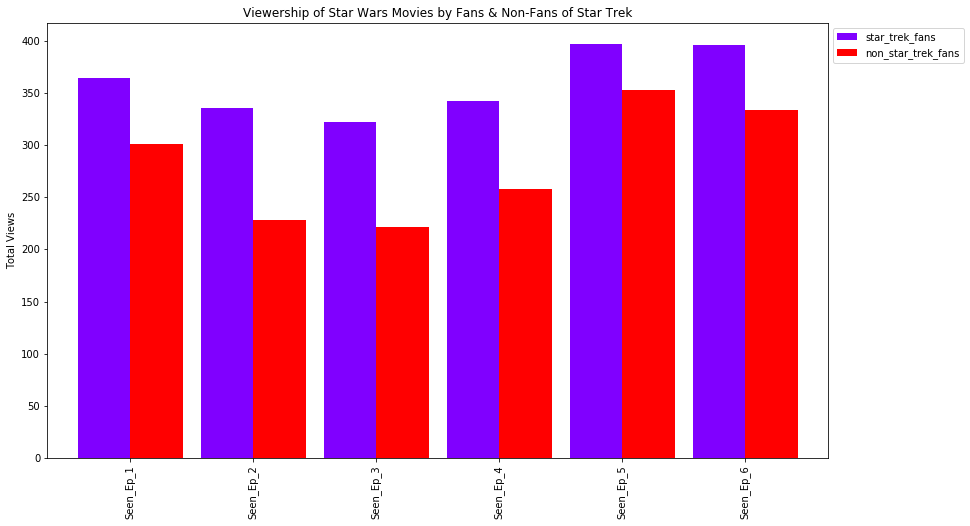

In [31]:
df = pd.DataFrame({'star_trek_fans': tot_views_st_fans,'non_star_trek_fans': tot_views_non_st_fans}, index=labels)
ax = df.plot(kind='bar',figsize=(14,8),colormap='rainbow',width=0.85)
ax.legend(bbox_to_anchor=[1, 1])
plt.title('Viewership of Star Wars Movies by Fans & Non-Fans of Star Trek')
plt.ylabel('Total Views')
plt.show()

We can observe that almost all of the star trek fans (~420 from our survey) have watched Star Wars Episodes 5 and 6! We also observe something very unexpected that more star trek fans have watched all Star Wars episodes than non star trek fans. It perhaps may be that the fans of star trek are fans of space/science fiction in general and hence, watched all the episodes of Star Wars too.

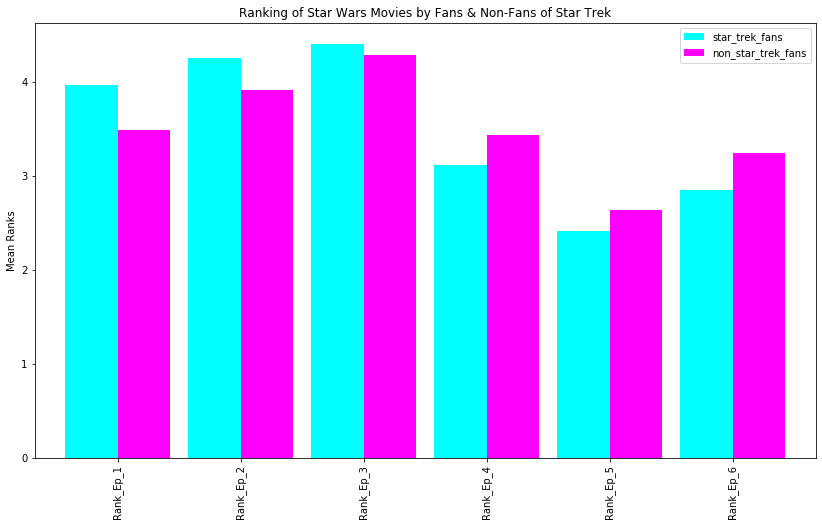

In [32]:
index = ['star_trek_fans','non_star_trek_fans']
labels=['Rank_Ep_1','Rank_Ep_2','Rank_Ep_3','Rank_Ep_4','Rank_Ep_5','Rank_Ep_6']
ranks_st_fans = pd.DataFrame.mean(star_trek_fans.loc[:,'Rank_Ep_1':'Rank_Ep_6']).values
ranks_non_st_fans = pd.DataFrame.mean(non_star_trek_fans.loc[:,'Rank_Ep_1':'Rank_Ep_6']).values

df = pd.DataFrame({'star_trek_fans': ranks_st_fans,'non_star_trek_fans': ranks_non_st_fans}, index=labels)
ax = df.plot(kind='bar',figsize=(14,8),colormap='cool',width=0.85)
ax.legend(bbox_to_anchor=[1, 1])
plt.title('Ranking of Star Wars Movies by Fans & Non-Fans of Star Trek')
plt.ylabel('Mean Ranks')
plt.show()

We note that the ranking order is exactly the same between the star-trek and non star trek fan groups - Episode 5 > Episode 6 > Episode 4 > Episode 1 > Episode 2 > Episode 3. 